In [ ]:
import sys
sys.path.append(r'../')
import numpy as np
from functions import *

%reload_ext autoreload
%autoreload 2

In [11]:
import numpy

In [15]:
from tensorflow import keras

TypeError: bases must be types

In [ ]:
### Load Data (and excluding behavioural neurons)
worm_num = 4
b_neurons = [
    'AVAR',
    'AVAL',
    'SMDVR',
    'SMDVL',
    'SMDDR',
    'SMDDL',
    'RIBR',
    'RIBL',]
data = Database(data_set_no=worm_num)
data.exclude_neurons(b_neurons)
X = data.neuron_traces.T
B = data.states

### Preprocess and prepare data for BundLe Net
time, X = preprocess_data(X, data.fps)
X_, B_ = prep_data(X, B, win=15)

### Deploy BunDLe Net
model = BunDLeNet(latent_dim=3)
model.build(input_shape=X_.shape)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

n_epochs = 1000
gamma = 0.9

#X_train, X_test, B_train, B_test = timeseries_train_test_split(X_, B_)
loss_array = train_model(X_, B_, model, optimizer, gamma, n_epochs, pca_init=True)

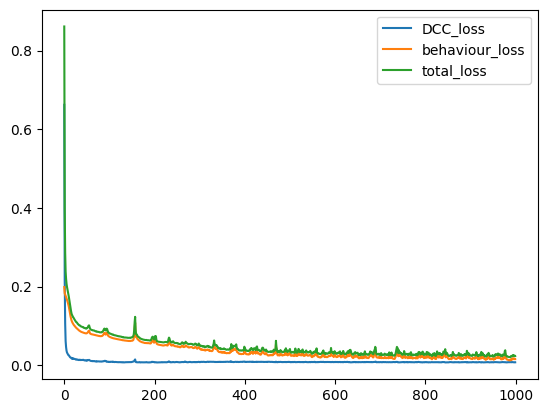

In [3]:
# Training losses vs epochs
%matplotlib inline
for i, label in  enumerate(["DCC_loss", "behaviour_loss","total_loss" ]):
    plt.plot(loss_array[:,i], label=label)
plt.legend()
#plt.ylim(0,.01)

### Projecting into latent space

In [4]:
Y0_ = model.tau(X_[:,0]).numpy() 

In [5]:
algorithm = 'BunDLeNet'
np.savetxt('data/generated/saved_Y/Y0__' + algorithm + '_worm_' + str(worm_num), Y0_)
np.savetxt('data/generated/saved_Y/B__' + algorithm + '_worm_' + str(worm_num), B_)

In [6]:
algorithm = 'BunDLeNet'
Y0_ = np.loadtxt('data/generated/saved_Y/Y0__' + algorithm + '_worm_' + str(worm_num))
B_ = np.loadtxt('data/generated/saved_Y/B__' + algorithm + '_worm_' + str(worm_num)).astype(int)

(0.0, 3006.0, -0.5, 0.5)

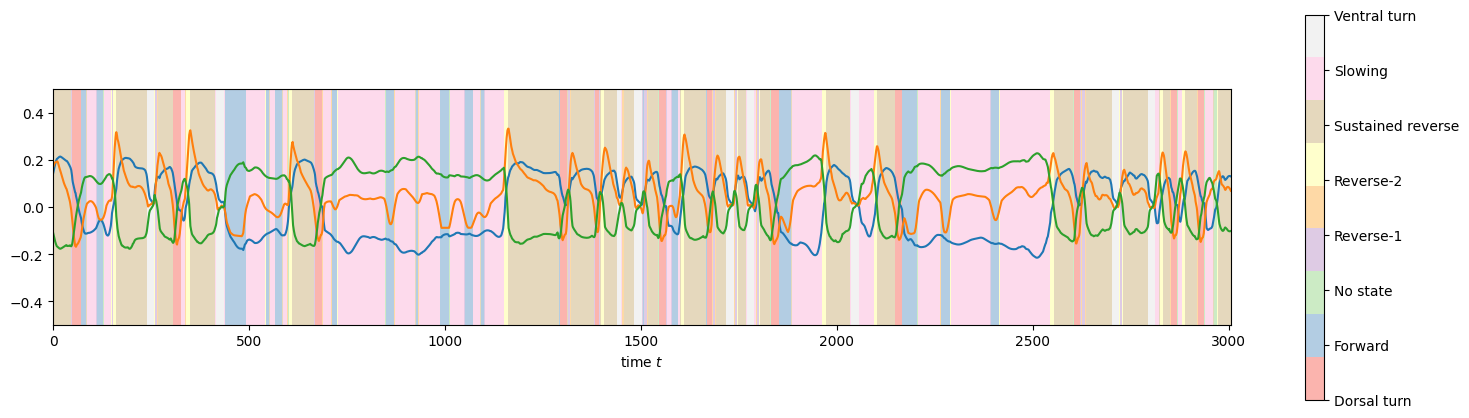

In [7]:
### Plotting latent space dynamics
%matplotlib inline
plt.figure(figsize=(19,5))
plt.imshow([B_],aspect=600,cmap="Pastel1")
cbar = plt.colorbar(ticks=np.arange(8))
cbar.ax.set_yticklabels(['Dorsal turn', 'Forward', 'No state', 'Reverse-1', 'Reverse-2', 'Sustained reverse', 'Slowing', 'Ventral turn']) 
plt.plot(Y0_/Y0_.max()/3)
plt.xlabel("time $t$")
plt.axis([0,Y0_.shape[0],-0.5,0.5])

<IPython.core.display.Javascript object>


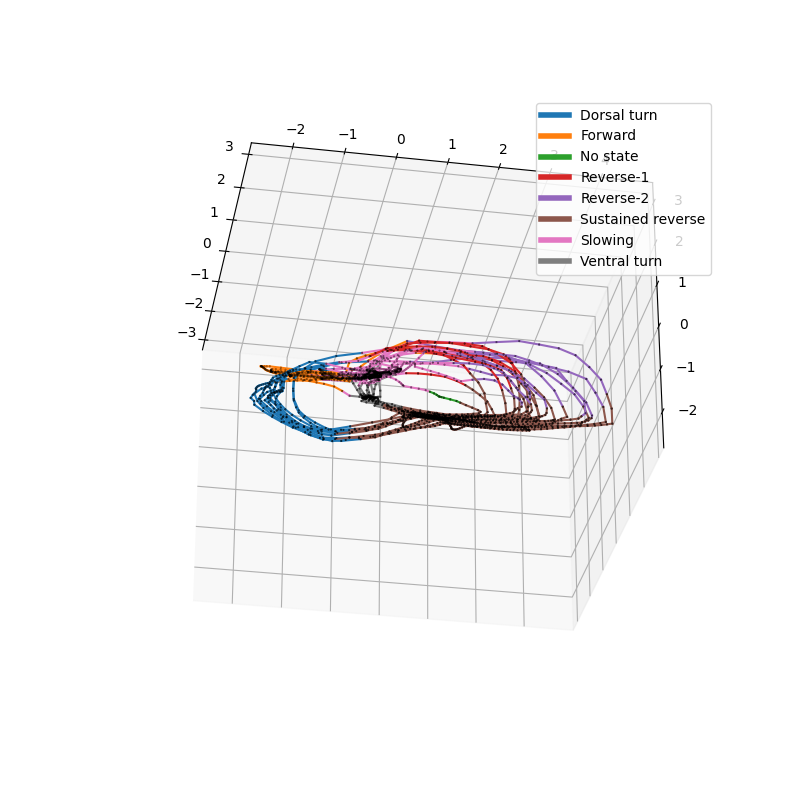

<Axes3DSubplot: >

In [10]:
%matplotlib notebook
plot_phase_space(Y0_, B_, show_points=True)

In [11]:
### Run to produce rotating 3-D plot
#%matplotlib notebook
#rotating_plot(Y0_, B_,filename='rotation_'+ algorithm + '_worm_'+str(worm_num) +'.gif')

### Performing PCA on the latent dimension (to check if there are redundant or correlated components)


(0.0, 3006.0, -0.5, 0.5)

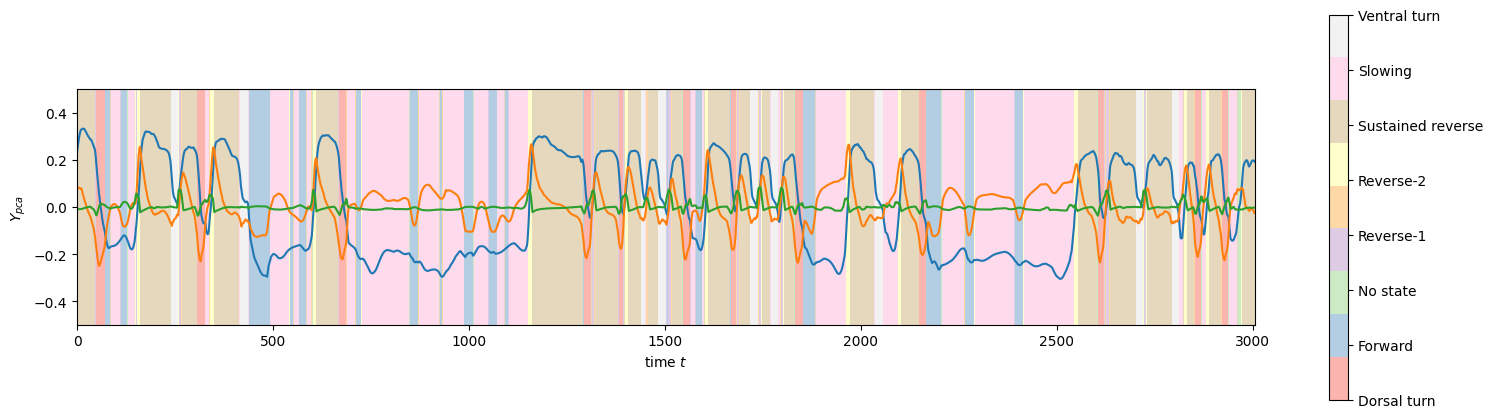

In [12]:
%matplotlib inline
pca = PCA()
Y_pca = pca.fit_transform(Y0_)
plt.figure(figsize=(19,5))
plt.imshow([B_],aspect=600,cmap="Pastel1")
cbar = plt.colorbar(ticks=np.arange(8))
cbar.ax.set_yticklabels(['Dorsal turn', 'Forward', 'No state', 'Reverse-1', 'Reverse-2', 'Sustained reverse', 'Slowing', 'Ventral turn']) 
plt.plot(Y_pca/Y_pca.max()/3)
plt.xlabel("time $t$")
plt.ylabel("$Y_{pca}$")
plt.axis([0,Y_pca.shape[0],-0.5,0.5])

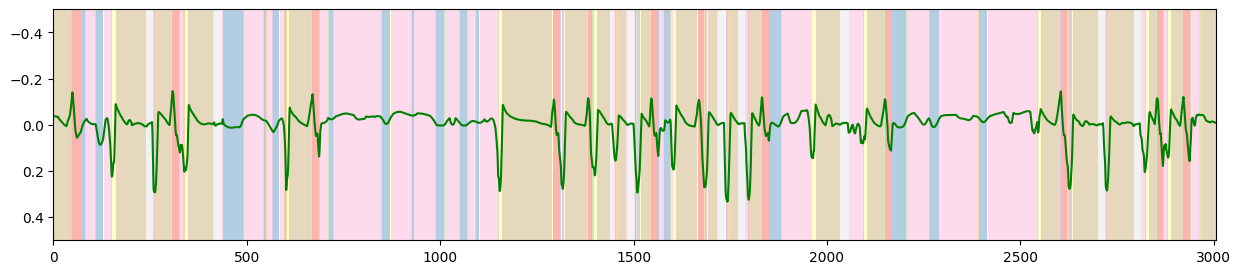

In [13]:
%matplotlib inline
plt.figure(figsize=(15,3))
plt.imshow([B_],aspect="auto",cmap="Pastel1")
plt.plot(Y_pca[:,2]/3/np.max(np.abs(Y_pca[:,2])), color = 'green')

### Behaviour predictor (implicit in the AbC net)


In [14]:
Y0_ = model.tau(X_[:,0]).numpy() # Y_t
Y1_ = model.tau(X_[:,1]).numpy()

In [15]:
B_pred = model.predictor(Y1_).numpy().argmax(axis=1)
accuracy_score(B_pred, B_)

0.9214903526280772